In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

In [ ]:
# def plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes):
#     if not os.path.exists(image_path):
#         raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
#     try:
#         image = Image.open(image_path)
#         image = np.array(image)
#     except Exception as e:
#         raise IOError(f"Error reading the image: {e}")
    
#     if len(image.shape) == 2:
#         image = np.stack((image,) * 3, axis=-1)
#     height, width = image.shape[:2]
    
#     # Channel names
#     channel_names = ['T1', 'T2', 'T2S']
    
#     fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
#     for channel_idx, channel_name in enumerate(channel_names):
#         channel = image[:, :, channel_idx]
        
#         # Plot image
#         ax = axes[channel_idx]
#         ax.imshow(channel, cmap='gray')
#         ax.axis('off')
        
#         for bbox in pred_bboxes:
#             x, y, pred_width, pred_height = bbox
            
            
#             rect = plt.Rectangle((x, y), pred_width, pred_height,
#                                linewidth=1.5, edgecolor='blue', facecolor='none', 
#                                linestyle='-', label='Prediction' if channel_idx == 0 else "")
#             ax.add_patch(rect)
        
#         for bbox in gt_bboxes:
#             class_id, x_center, y_center, gt_width, gt_height = bbox
#             center_x = int(x_center * width)
#             center_y = int(y_center * height)
            
#             patch_size_w = gt_width * width
#             patch_size_h = gt_height * height
            
#             x_min = center_x - patch_size_w // 2
#             y_min = center_y - patch_size_h // 2
            
#             if class_id == 0:
#                 rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
#                                linewidth=1, edgecolor='red', facecolor='none',
#                                linestyle='-', label='Ground Truth' if channel_idx == 0 else "")

#             elif class_id == 1:
#                 rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
#                                linewidth=1, edgecolor='green', facecolor='none',
#                                linestyle='-', label='Ground Truth' if channel_idx == 0 else "")

#             ax.add_patch(rect)
    
#     if pred_bboxes and gt_bboxes:
#         from matplotlib.patches import Patch
#         legend_elements = [
#             Patch(facecolor='none', edgecolor='green', linewidth=1, label='Prediction'),
#             Patch(facecolor='none', edgecolor='green', linewidth=1, label='Ground Truth')
#         ]
#         fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.95))
    
#     plt.tight_layout()
#     plt.show()

# def visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_predictions):
#     """
#     Visualize both YOLO predictions and ground truth on the same image
    
#     Args:
#         root_path: Root path to the dataset
#         img_num: Image number (e.g., "110")
#         slice_num: Slice number (e.g., "030")
#         yolo_predictions: List of YOLO prediction dictionaries
#     """
#     # Construct paths
#     label_path = f"{root_path}/labels/{task}/sub-{img_num}_slice_{slice_num}.txt"
#     image_path = label_path.replace("labels", "images").replace("txt", "png")
#     image_id = f"sub-{img_num}_slice_{slice_num}"
    
#     try:
#         # Load ground truth bounding boxes
#         gt_bboxes = []
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as txt_file:
#                 gt_bboxes = [list(map(float, line.split())) for line in txt_file.readlines()]
        
#         # Filter predictions for this specific image
#         pred_bboxes = []
#         for pred in yolo_predictions:
#             if pred['image_id'] == image_id:
#                 bbox = pred['bbox']
#                 # Only include predictions with non-zero bounding boxes
#                 if bbox[2] > 0 and bbox[3] > 0:  # width and height > 0
#                     pred_bboxes.append(bbox)
        
#         # Plot both predictions and ground truth
#         plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes)
        
#         print(f"Image: {image_id}")
#         print(f"Ground Truth boxes: {len(gt_bboxes)}")
#         print(f"Prediction boxes: {len(pred_bboxes)}")
        
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         try:
#             with Image.open(image_path) as img:
#                 print(f"Image format: {img.format}")
#                 print(f"Image size: {img.size}")
#                 print(f"Image mode: {img.mode}")
#         except Exception as e:
#             print(f"Could not open the image for additional information: {e}")

In [ ]:
def plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes, yolo_predictions, img_num, slice_num):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
    try:
        image = Image.open(image_path)
        image = np.array(image)
    except Exception as e:
        raise IOError(f"Error reading the image: {e}")
    
    if len(image.shape) == 2:
        image = np.stack((image,) * 3, axis=-1)
    height, width = image.shape[:2]
    
    # Channel names
    channel_names = ['T1', 'T2', 'T2S']
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for channel_idx, channel_name in enumerate(channel_names):
        channel = image[:, :, channel_idx]
        
        # Plot image
        ax = axes[channel_idx]
        ax.imshow(channel, cmap='gray')
        ax.axis('off')
        
        # Draw prediction bounding boxes
        for pred in yolo_predictions:
            if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}":
                category_id = pred['category_id']
                x, y, pred_width, pred_height = pred['bbox']
                
                # Only include predictions with non-zero bounding boxes
                if pred_width > 0 and pred_height > 0:
                    if category_id == 1:
                        # Blue for category 1
                        rect = plt.Rectangle((x, y), pred_width, pred_height,
                                           linewidth=2, edgecolor='blue', facecolor='none', 
                                           linestyle='-')
                        ax.add_patch(rect)
                    elif category_id == 2:
                        # White for category 2
                        rect = plt.Rectangle((x, y), pred_width, pred_height,
                                           linewidth=0.5, edgecolor='pink', facecolor='none', 
                                           linestyle='-')
                        ax.add_patch(rect)
        
        # Draw ground truth bounding boxes
        for bbox in gt_bboxes:
            class_id, x_center, y_center, gt_width, gt_height = bbox
            center_x = int(x_center * width)
            center_y = int(y_center * height)
            
            patch_size_w = gt_width * width
            patch_size_h = gt_height * height
            
            x_min = center_x - patch_size_w // 2
            y_min = center_y - patch_size_h // 2
            
            if class_id == 0:
                # Red for class 0
                rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
                                   linewidth=1, edgecolor='red', facecolor='none',
                                   linestyle='-')
                ax.add_patch(rect)
            elif class_id == 1:
                # Pink for class 1
                rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
                                   linewidth=1, edgecolor='green', facecolor='none',
                                   linestyle='-')
                ax.add_patch(rect)
    
    # Create legend with correct colors
    if pred_bboxes or gt_bboxes:
        from matplotlib.patches import Patch
        legend_elements = []
        
        # Add prediction legend entries
        if any(pred['category_id'] == 1 for pred in yolo_predictions if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}"):
            legend_elements.append(Patch(facecolor='none', edgecolor='blue', linewidth=1, label='CMB-Pred'))
        if any(pred['category_id'] == 2 for pred in yolo_predictions if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}"):
            legend_elements.append(Patch(facecolor='none', edgecolor='pink', linewidth=1, label='CSF-Pred'))
        
        # Add ground truth legend entries
        if any(bbox[0] == 0 for bbox in gt_bboxes):
            legend_elements.append(Patch(facecolor='none', edgecolor='red', linewidth=1, label='CMB-GT'))
        if any(bbox[0] == 1 for bbox in gt_bboxes):
            legend_elements.append(Patch(facecolor='none', edgecolor='green', linewidth=1, label='CSF-GT'))
        
        if legend_elements:
            fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.95))
    
    plt.tight_layout()
    plt.show()

def visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_predictions, task):
    """
    Visualize both YOLO predictions and ground truth on the same image
    
    Args:
        root_path: Root path to the dataset
        img_num: Image number (e.g., "110")
        slice_num: Slice number (e.g., "030")
        yolo_predictions: List of YOLO prediction dictionaries
    """
    # Construct paths
    label_path = f"{root_path}/labels/{task}/sub-{img_num}_slice_{slice_num}.txt"
    image_path = label_path.replace("labels", "images").replace("txt", "png")
    image_id = f"sub-{img_num}_slice_{slice_num}"
    
    try:
        # Load ground truth bounding boxes
        gt_bboxes = []
        if os.path.exists(label_path):
            with open(label_path, 'r') as txt_file:
                gt_bboxes = [list(map(float, line.split())) for line in txt_file.readlines()]
        
        # Filter predictions for this specific image
        pred_bboxes = []
        for pred in yolo_predictions:
            if pred['image_id'] == image_id:
                bbox = pred['bbox']
                # Only include predictions with non-zero bounding boxes
                if bbox[2] > 0 and bbox[3] > 0:  # width and height > 0
                    pred_bboxes.append(bbox)
        
        # Plot both predictions and ground truth
        plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes, yolo_predictions, img_num, slice_num)
        
        print(f"Image: {image_id}")
        print(f"Ground Truth boxes: {len(gt_bboxes)}")
        print(f"Prediction boxes: {len(pred_bboxes)}")
        
        # Print class distribution
        if gt_bboxes:
            gt_classes = [int(bbox[0]) for bbox in gt_bboxes]
            print(f"GT Class distribution: {dict(zip(*np.unique(gt_classes, return_counts=True)))}")
        
        if yolo_predictions:
            pred_categories = [pred['category_id'] for pred in yolo_predictions if pred['image_id'] == image_id and pred['bbox'][2] > 0 and pred['bbox'][3] > 0]
            if pred_categories:
                print(f"Prediction Category distribution: {dict(zip(*np.unique(pred_categories, return_counts=True)))}")
        
    except Exception as e:
        print(f"An error occurred: {e}")
        try:
            with Image.open(image_path) as img:
                print(f"Image format: {img.format}")
                print(f"Image size: {img.size}")
                print(f"Image mode: {img.mode}")
        except Exception as e:
            print(f"Could not open the image for additional information: {e}")

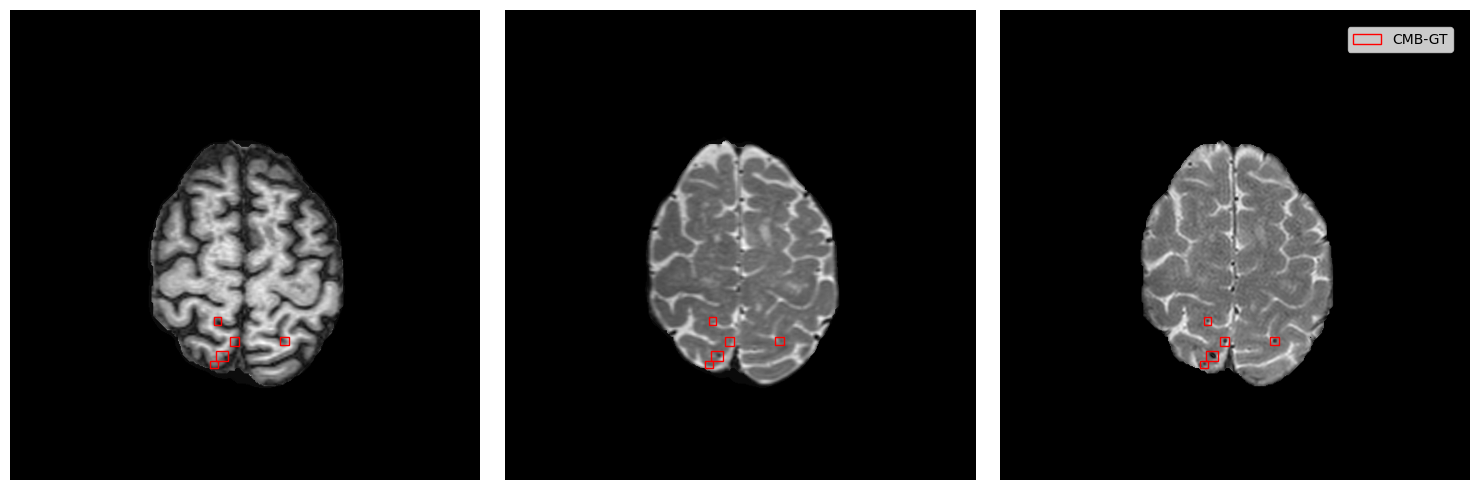

Image: sub-110_slice_030
Ground Truth boxes: 5
Prediction boxes: 6
GT Class distribution: {np.int64(0): np.int64(5)}
Prediction Category distribution: {np.int64(0): np.int64(6)}


In [ ]:
# Your existing YOLO predictions
yolo_output = [
     {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [811.5, 661.0, 33.0, 31.0], "score": 0.16882}, {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [797.0, 647.5, 48.0, 46.0], "score": 0.1571}, {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [1185.0, 1426.0, 34.0, 38.0], "score": 0.07214}, {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [1179.0, 1426.0, 32.0, 34.0], "score": 0.07111}, {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [807.0, 652.0, 42.0, 37.0], "score": 0.05234}, {"image_id": "sub-110_slice_030", "category_id": 0, "bbox": [1170.0, 1415.0, 54.0, 60.0], "score": 0.03047}
]

# Your existing parameters
task = "val"
img_num = "110"
slice_num = "030"

# csf
root_path = "/media/Datacenter_storage/Ji/valdo_dataset/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_GAN_2class_csf"

# all sequence
# root_path = "/media/Datacenter_storage/Ji/valdo_dataset/valdo_all_sequence_cmbOnly_GAN"

visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_output, task)